**Name of Student** :- Gauri Kishor Damle\
**NUID**:- 002931881

# **IE 7374 ST: Natural Language Processing**

# Content 

1. Title page 

2. Introduction

3. Problem statement

4. Data used

5. Method used

6. Experimental results

7. Conclusion

8. Appendix

9. Reference

# **Title : Women Clothing Review Analysis** 


# **Introduction**


E-commerce is growing at a fast pace. In E-commerce applications/websites customers provide feedback/rating while returning order. This generates a large size of raw data. When dealing with such velocity and volume of big data to hold customers it is important to check customer satisfaction at every stage of feedback. Thus, understanding and then making sense out of these customer reviews is an important problem to be looked at.


The purpose of the analysis is to focus on how the Reviews and rating scores which to be utilized to derive business insights. The classifier engine is given input from these raw language reviews. The engine rates the review as 1 or 0 suggesting it as positive or negative. The further the negative reviews are fee to topic modeling to identify the top 10 issues with the ordered item categorizing it further into actionable bucket items like Size misfit, Color, Cloth material etc. 


# **Problem Statement** 


Given a dataset with reviews of women's clothing, objective is to predict whether the rating associated with the review will be 5-star or not using TensorFlow/Keras recurrent neural network.

From the prediction, it can be found out if the customer is likely to refer this clothing to their friends or not.

This output is helpful to know if the customer is going to continue shopping or not in the future. 

Prediction is binary classification model which takes 2 inputs 


1.   Customer Reviews
2.   Customer Review Title

It then tries to predict the rating in binary form 1 or 0. 
 
1.  1 indicates positive feedback
2.  0 means negative feedback.

Furthermore the negative ratings dataset is filtered and topic modelling analysis is performed on the same to find out the top 10 issues with clothing items.This topic model engine suggests the issue with the ordered item categorizing it further into actionable bucket items like Size misfit, Color, Cloth material etc. using LDA topic modeling libraries.







# **Data Used** 

The dataset is collected from Kaggle website link as follows:


https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews/discussion


#### The above mentioned data revolves around the real world customer reviews of e - commerce company. This data is santized and made sure the references to original company are being removed.


#### The datset has 10 columns/ features with 22641 records/rows catching customer feedback.

#### Each row corresponds to a customer review, and includes the variables:

**Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.\
**Age:** Positive Integer variable of the reviewers age.\
**Title:** String variable for the title of the review.\
**Review Text:**String variable for the review body.\
**Rating:**Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.\
**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.\
**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.\
**Division Name:**Categorical name of the product high level division.\
**Department Name:** Categorical name of the product department name.\
**Class Name:**Categorical name of the product class name.

In [ ]:
#### Import required libraries
import os
import re
import time
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
from operator import itemgetter
from typing import Dict, Tuple, List, Set
from time import time


## visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### nltk
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
import dataclasses
from nltk import word_tokenize
from nltk.corpus import stopwords 
import string 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import movie_reviews
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from random import shuffle

## sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV



## gensim 
import gensim
from gensim.models import Word2Vec
from gensim.models import FastText
from gensim.corpora import Dictionary
import gensim.downloader as api
from gensim.models import Word2Vec as w2v
from keras.preprocessing.sequence import pad_sequences
from gensim.models import KeyedVectors

## tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional, Activation
from tensorflow.keras.preprocessing.text import Tokenizer


## gensim 
import gensim
from gensim.models import Word2Vec
from gensim.models import FastText
from gensim.corpora import Dictionary
import gensim.downloader as api
from gensim.models import Word2Vec as w2v
from keras.preprocessing.sequence import pad_sequences
from gensim.models import KeyedVectors

## tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional, Activation, GRU
from tensorflow.keras.preprocessing.text import Tokenizer

## transformers
!pip install simpletransformers
from simpletransformers.language_representation import RepresentationModel

## warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

!pip install -U textblob
!python -m textblob.download_corpora
from textblob import TextBlob


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 249 kB 23.2 MB/s 
     |████████████████████████████████| 1.3 MB 29.8 MB/s 
     |████████████████████████████████| 4.7 MB 55.2 MB/s 
     |████████████████████████████████| 1.8 MB 52.4 MB/s 
     |████████████████████████████████| 6.6 MB 27.3 MB/s 
     |████████████████████████████████| 365 kB 52.7 MB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 9.1 MB 42.7 MB/s 
     |████████████████████████████████| 101 kB 10.4 MB/s 
     |████████████████████████████████| 596 kB 54.0 MB/s 
     |████████████████████████████████| 181 kB 63.8 MB/s 
     |████████████████████████████████| 157 kB 56.4 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 157 kB 62.6 MB/s 
     |████████████████████████████████| 157 kB 65.5 MB/s 
     |█████████████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 30.1 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_womens_clothing_dataset = pd.read_csv('/content/drive/MyDrive/SemesterTwo/IE7374/Project1/Project1/archive/Womens Clothing E-Commerce Reviews.csv')

In [ ]:
df_womens_clothing_dataset["Department Name"].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

# **EDA**

#### As part of EDA the dataset is throughly checked by checking data quality, data distribution, null checks, avoiding duplicates and overall making sure data can be preprocessed to feed to model.


In [ ]:
df_womens_clothing_dataset

Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
0                                                    NaN   
1                                                    NaN   
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
...                                                  ...   
23481                     Great dress for many occasions   
23482                         Wish it was made of cotton   
23483                              Cute, but see through   
23484  Very cute dress, perfect for summer parties an...   
23485                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
0            Intimate  Intimates  
1             Dresses    Dresses  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[23486 rows x 11 columns]

#### The above mentioned data revolves around the real world customer reviews of e - commerce company. This data is santized and made sure the references to original company are being removed.


In [ ]:
df_womens_clothing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
df_womens_clothing_dataset.shape

(23486, 11)

## Null checks

Input feature **Review Test** is having 845 null and 22641 non-null records 

Similarly second input feature **Title** is having 3810 null and 19676 non-null records

These records are to be preprocessed and dropped before fitting model and performing NLP


In [ ]:
df_womens_clothing_dataset['Review Text'].isna().sum()

845

In [ ]:
df_womens_clothing_dataset['Title'].isna().sum()

3810

In [ ]:
#df_womens_clothing_dataset.columns

df_null_title = df_womens_clothing_dataset[df_womens_clothing_dataset['Review Text'].isna()]
missing_input_index = df_null_title[df_null_title['Title'].isna()].index


df_womens_clothing_dataset = df_womens_clothing_dataset.drop(missing_input_index, axis =0).reset_index(drop=True)
df_womens_clothing_dataset.shape

(22642, 11)

For null checks all the records with both the input features(Title and Review Text) showing null values were deleted. Thus total of 844 records got deleted from dataset with 23486 records.

#### Step 1 :- Fill missing values in both the columns with "0" string



In [ ]:
df_womens_clothing_dataset['Review Text'] = df_womens_clothing_dataset['Review Text'].fillna("0")

In [ ]:
df_womens_clothing_dataset['Title'] = df_womens_clothing_dataset['Title'].fillna("0")


#### Step 2 :- Concate both the columns togather to make single column 

In [ ]:
df_womens_clothing_dataset['Input']  = df_womens_clothing_dataset['Title'] + " " + df_womens_clothing_dataset['Review Text'] 


#### step 3 :- Check for nulls from this concatenated column

In [ ]:
df_womens_clothing_dataset['Input'].isna().sum()
#df_womens_clothing_dataset.shape

0

Overall the final Input column = Title + Review Text is not having any nulls.

## Duplicate checks 



#### Review Text

In [ ]:
df_womens_clothing_dataset['Review Text'].nunique()

22635

In [ ]:
df_womens_clothing_dataset['Review Text'].value_counts()

Perfect fit and i've gotten so many compliments. i buy all my suits from here now!                                                                                                                                                                                                                                                                                                                                                                                                                                        3
I purchased this and another eva franco dress during retailer's recent 20% off sale. i was looking for dresses that were work appropriate, but that would also transition well to happy hour or date night. they both seemed to be just what i was looking for. i ordered a 4 regular and a 6 regular, as i am usually in between sizes. the 4 was definitely too small. the 6 fit, technically, but was very ill fitting. not only is the dress itself short, but it is very short-waisted. i am only 5'3",

In [ ]:
df_womens_clothing_dataset['Review Text'].duplicated().sum()

7

As per the duplicates check Review Text input feture is having 7 duplicates rest all reviews are unique.

#### Title

In [ ]:
df_womens_clothing_dataset['Title'].nunique()

13994

In [ ]:
df_womens_clothing_dataset['Title'].value_counts()

0                                          2966
Love it!                                    136
Beautiful                                    95
Love                                         88
Love!                                        84
                                           ... 
Not for my body                               1
Perfect transition dress                      1
The perfect spring dress!                     1
Super soft but can make you look frumpy       1
Please make more like this one!               1
Name: Title, Length: 13994, dtype: int64

In [ ]:
df_womens_clothing_dataset['Title'].duplicated().sum()

8648

As per the duplicates check Title input feture is having 8648 duplicates rest all reviews are unique. Most of the duplicates are null values filled with zero.

#### Input

In [ ]:
df_womens_clothing_dataset['Input'].nunique()

22637

In [ ]:
df_womens_clothing_dataset['Input'].value_counts()

Love retailer bathing suits! Perfect fit and i've gotten so many compliments. i buy all my suits from here now!                                                                                                                                                                                                                                                                                                                                                                                                                                               3
0 Love, love these jeans. being short they come right to my ankle. super soft and don?t require any hemming. i ordered my typical jean size of 26 and they fit like a glove. would love to have these in black and grey.                                                                                                                                                                                                                                                

In [ ]:
df_womens_clothing_dataset['Input'].duplicated().sum()

5

As per the duplicates check, the final input feture is having only 5 duplicates rest all reviews are unique. 

In [ ]:
df_womens_clothing_dataset.shape


(22642, 12)

## **Creating Analysis Fields - Word Count and Word Clouds**


The Input data contains unclean data.

To improve performance of model, lower casing, punctuation removal stop words removal is performed as part of preprocessing.

In [ ]:
#### Lower Casing
def lowerCasing(total_dataset):
  return total_dataset.apply(lambda x: " ".join(x.lower() for x in x.split()))


df_womens_clothing_dataset['Input'] = lowerCasing(df_womens_clothing_dataset['Input'])
df_womens_clothing_dataset['Input']


0        0 absolutely wonderful - silky and sexy and co...
1        0 love this dress! it's sooo pretty. i happene...
2        some major design flaws i had such high hopes ...
3        my favorite buy! i love, love, love this jumps...
4        flattering shirt this shirt is very flattering...
                               ...                        
22637    great dress for many occasions i was very happ...
22638    wish it was made of cotton it reminds me of ma...
22639    cute, but see through this fit well, but the t...
22640    very cute dress, perfect for summer parties an...
22641    please make more like this one! this dress in ...
Name: Input, Length: 22642, dtype: object

In [ ]:
#### Punctuation Removal
def removePunctuation(data):
  return data.str.replace('[^\w\s]','')


df_womens_clothing_dataset['Input'] = removePunctuation(df_womens_clothing_dataset['Input'])
df_womens_clothing_dataset['Input']

0        0 absolutely wonderful  silky and sexy and com...
1        0 love this dress its sooo pretty i happened t...
2        some major design flaws i had such high hopes ...
3        my favorite buy i love love love this jumpsuit...
4        flattering shirt this shirt is very flattering...
                               ...                        
22637    great dress for many occasions i was very happ...
22638    wish it was made of cotton it reminds me of ma...
22639    cute but see through this fit well but the top...
22640    very cute dress perfect for summer parties and...
22641    please make more like this one this dress in a...
Name: Input, Length: 22642, dtype: object

In [ ]:
#### Identifying and Removing Stop Words
def removeStopWords(data):
  stop_words = stopwords.words('english')
  return data.apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))


df_womens_clothing_dataset['Input'] = removeStopWords(df_womens_clothing_dataset['Input'])
df_womens_clothing_dataset['Input']

0            0 absolutely wonderful silky sexy comfortable
1        0 love dress sooo pretty happened find store i...
2        major design flaws high hopes dress really wan...
3        favorite buy love love love jumpsuit fun flirt...
4        flattering shirt shirt flattering due adjustab...
                               ...                        
22637    great dress many occasions happy snag dress gr...
22638    wish made cotton reminds maternity clothes sof...
22639    cute see fit well top see never would worked i...
22640    cute dress perfect summer parties bought dress...
22641    please make like one dress lovely platinum fem...
Name: Input, Length: 22642, dtype: object

In [ ]:
df_eda = df_womens_clothing_dataset.copy()
df_eda

Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
...           ...          ...  ...   
22637       23481         1104   34   
22638       23482          862   48   
22639       23483         1104   31   
22640       23484         1084   28   
22641       23485         1104   52   

                                                   Title  \
0                                                      0   
1                                                      0   
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
...                                                  ...   
22637                     Great dress for many occasions   
22638                         Wish it was made of cotton   
22639                              Cute, but see through   
22640  Very cute dress, perfect for summer parties an...   
22641                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
22637  I was very happy to snag this dress at such a ...       5   
22638  It reminds me of maternity clothes. soft, stre...       3   
22639  This fit well, but the top was very see throug...       3   
22640  I bought this dress for a wedding i have this ...       3   
22641  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
22637                1                        0  General Petite   
22638                1                        0  General Petite   
22639                0                        1  General Petite   
22640                1                        2         General   
22641                1                       22  General Petite   

      Department Name Class Name  \
0            Intimate  Intimates   
1             Dresses    Dresses   
2             Dresses    Dresses   
3             Bottoms      Pants   
4                Tops    Blouses   
...               ...        ...   
22637         Dresses    Dresses   
22638            Tops      Knits   
22639         Dresses    Dresses   
22640         Dresses    Dresses   
22641         Dresses    Dresses   

                                                   Input  
0          0 absolutely wonderful silky sexy comfortable  
1      0 love dress sooo pretty happened find store i...  
2      major design flaws high hopes dress really wan...  
3      favorite buy love love love jumpsuit fun flirt...  
4      flattering shirt shirt flattering due adjustab...  
...                                                  ...  
22637  great dress many occasions happy snag dress gr...  
22638  wish made cotton reminds maternity clothes sof...  
22639  cute see fit well top see never would worked i...  
22640  cute dress perfect summer parties bought dress...  
22641  please make like one dress lovely platinum fem...  

[22642 rows x 12 columns]

In [ ]:
df_eda.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Input'],
      dtype='object')

#### Selecting required columns for EDA

In [ ]:
df = df_eda[['Clothing ID', 'Age','Input','Division Name','Department Name','Class Name','Rating','Recommended IND']]
df

Clothing ID  Age                                              Input  \
0              767   33      0 absolutely wonderful silky sexy comfortable   
1             1080   34  0 love dress sooo pretty happened find store i...   
2             1077   60  major design flaws high hopes dress really wan...   
3             1049   50  favorite buy love love love jumpsuit fun flirt...   
4              847   47  flattering shirt shirt flattering due adjustab...   
...            ...  ...                                                ...   
22637         1104   34  great dress many occasions happy snag dress gr...   
22638          862   48  wish made cotton reminds maternity clothes sof...   
22639         1104   31  cute see fit well top see never would worked i...   
22640         1084   28  cute dress perfect summer parties bought dress...   
22641         1104   52  please make like one dress lovely platinum fem...   

        Division Name Department Name Class Name  Rating  Recommended IND  
0           Initmates        Intimate  Intimates       4                1  
1             General         Dresses    Dresses       5                1  
2             General         Dresses    Dresses       3                0  
3      General Petite         Bottoms      Pants       5                1  
4             General            Tops    Blouses       5                1  
...               ...             ...        ...     ...              ...  
22637  General Petite         Dresses    Dresses       5                1  
22638  General Petite            Tops      Knits       3                1  
22639  General Petite         Dresses    Dresses       3                0  
22640         General         Dresses    Dresses       3                1  
22641  General Petite         Dresses    Dresses       5                1  

[22642 rows x 8 columns]

In [ ]:
df['WordCountText']=df['Input'].str.lower().apply(word_tokenize) # Word Count Text
# Word Count

df['WordCount'] = df['WordCountText'].str.len() #Word Count Per review

df.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


index  Clothing ID  Age  \
0          0          767   33   
1          1         1080   34   
2          2         1077   60   
3          3         1049   50   
4          4          847   47   
...      ...          ...  ...   
22637  22637         1104   34   
22638  22638          862   48   
22639  22639         1104   31   
22640  22640         1084   28   
22641  22641         1104   52   

                                                   Input   Division Name  \
0          0 absolutely wonderful silky sexy comfortable       Initmates   
1      0 love dress sooo pretty happened find store i...         General   
2      major design flaws high hopes dress really wan...         General   
3      favorite buy love love love jumpsuit fun flirt...  General Petite   
4      flattering shirt shirt flattering due adjustab...         General   
...                                                  ...             ...   
22637  great dress many occasions happy snag dress gr...  General Petite   
22638  wish made cotton reminds maternity clothes sof...  General Petite   
22639  cute see fit well top see never would worked i...  General Petite   
22640  cute dress perfect summer parties bought dress...         General   
22641  please make like one dress lovely platinum fem...  General Petite   

      Department Name Class Name  Rating  Recommended IND  \
0            Intimate  Intimates       4                1   
1             Dresses    Dresses       5                1   
2             Dresses    Dresses       3                0   
3             Bottoms      Pants       5                1   
4                Tops    Blouses       5                1   
...               ...        ...     ...              ...   
22637         Dresses    Dresses       5                1   
22638            Tops      Knits       3                1   
22639         Dresses    Dresses       3                0   
22640         Dresses    Dresses       3                1   
22641         Dresses    Dresses       5                1   

                                           WordCountText  WordCount  
0      [0, absolutely, wonderful, silky, sexy, comfor...          6  
1      [0, love, dress, sooo, pretty, happened, find,...         32  
2      [major, design, flaws, high, hopes, dress, rea...         51  
3      [favorite, buy, love, love, love, jumpsuit, fu...         16  
4      [flattering, shirt, shirt, flattering, due, ad...         18  
...                                                  ...        ...  
22637  [great, dress, many, occasions, happy, snag, d...         15  
22638  [wish, made, cotton, reminds, maternity, cloth...         27  
22639  [cute, see, fit, well, top, see, never, would,...         21  
22640  [cute, dress, perfect, summer, parties, bought...         43  
22641  [please, make, like, one, dress, lovely, plati...         15  

[22642 rows x 11 columns]

#### Distribution of Word Counts

In [ ]:
#Import packages
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#Set defaults for graph formats
plt.rcParams['figure.figsize']=(15,10) #Sets default for the size of the graph
matplotlib.rcParams['axes.titlesize']=24 #Sets default for the size of the title
matplotlib.rcParams['axes.labelsize']=20 #Sets default for the size of the x/y axis labels


#### Number of words for each department

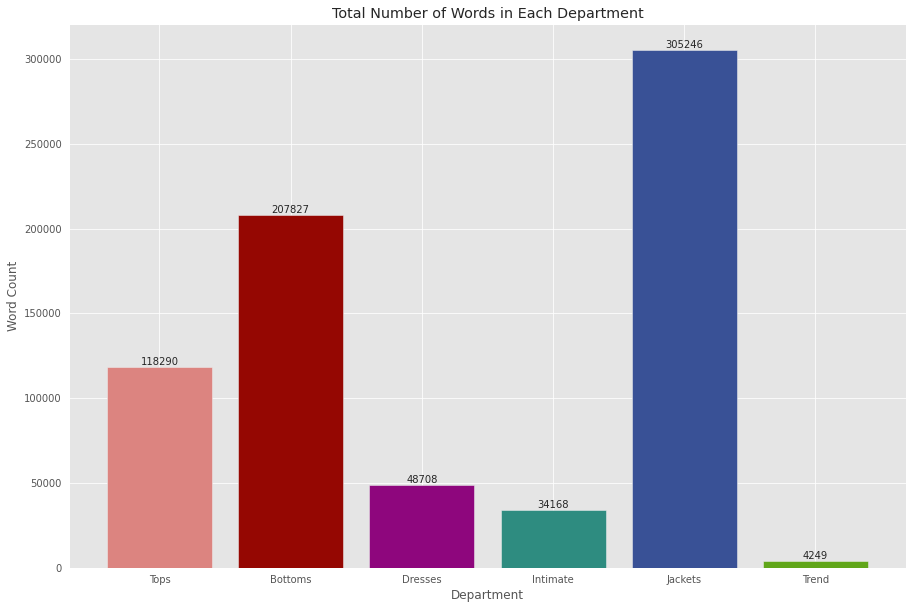

In [ ]:
DeptTitles=["Tops","Bottoms","Dresses","Intimate","Jackets","Trend"]

x = df.groupby(['Department Name'])['WordCount'].sum().reset_index()['Department Name']
y = df.groupby(['Department Name'])['WordCount'].sum().reset_index()['WordCount']


x_pos = np.arange(len(x))
plt.style.use('ggplot')
barchart=plt.bar(x_pos, y, color=['#DC8480', '#950702', '#8E067D', '#2E8C80', '#395196', '#60A619','#ECA10A'])



plt.xlabel("Department")
plt.ylabel("Word Count")
plt.title("Total Number of Words in Each Department")
plt.xticks(x_pos, DeptTitles)

# Add counts above the two bar graphs
for bar in barchart:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')



It can be concluded that Jackets have been reviewd maximum with word frequency of 305246 words followed by bottoms with 207827 words. For each department number of words indicate the opinion/ interest that customers hold about the specific department clothing. For instance trend clothing is not reviewed much with only 4249 words frequency.





#### Number of words in review with Agewise distribution

count    22642.000000
mean        43.279790
std         12.327023
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64


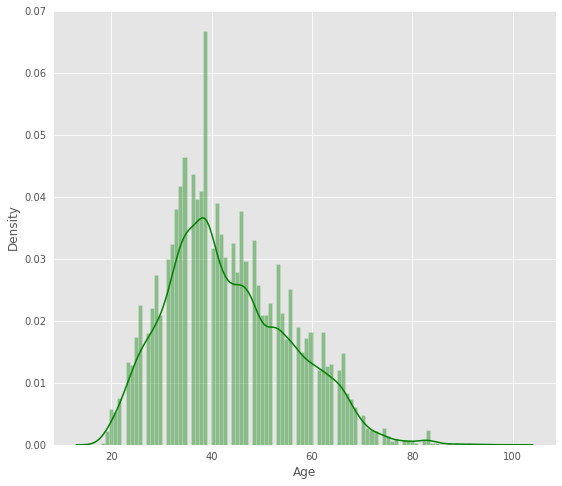

In [ ]:
print(df['Age'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Age'], color='g', bins=100, hist_kws={'alpha': 0.4});

#### With this plot it can be seen that the Age column data is normally distributed and some outliers lies above age 100. 

#### It can also be found out that targeted audience is from age 30 to 50 with mean age of 43

#### WordCloud generation

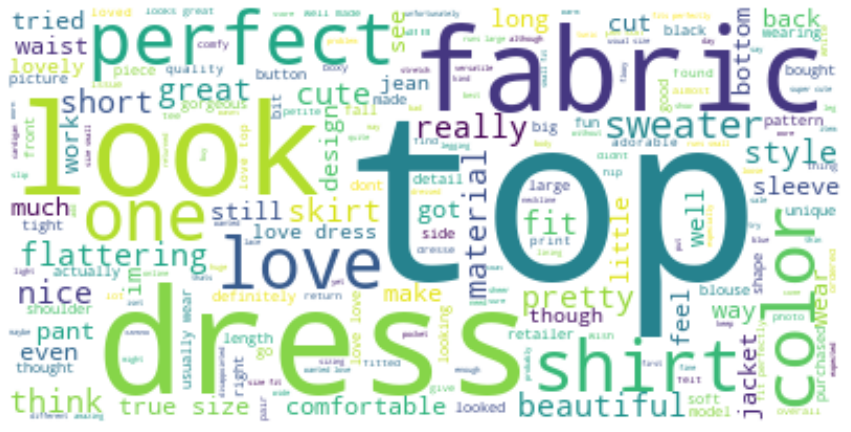

In [ ]:
text = " ".join(j for i in df.WordCountText for j in i)

wordcloud = WordCloud(background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The dataset had two columns where the text column contains textual data.
 

*   Title
*   Review Text


These two features are concatenated to get maximum words related to clothing product and build vocablary to feed it to NLP model.

The above digram shows the visualization of a word cloud from the concatenated text column.

Overall this concatenated column in this dataset with textual information indiactes opinions or reviews of people on different clothing products. 

To understand how most people think about the product, a word cloud of that column is created as part of EDA.

Using [TextBlob](https://textblob.readthedocs.io/en/dev/) to calculate sentiment polarity which lies in the range of [-1,1] where 1 means positive sentiment and -1 means a negative sentiment.

and also calculating word counts and review length. 

In [ ]:
df['Polarity'] = df['Input'].apply(lambda x: TextBlob(x).sentiment.polarity)

df['review_len'] = df['Input'].apply(lambda x: len(str(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

Clothing ID  Age                                              Input  \
0          767   33      0 absolutely wonderful silky sexy comfortable   
1         1080   34  0 love dress sooo pretty happened find store i...   
2         1077   60  major design flaws high hopes dress really wan...   
3         1049   50  favorite buy love love love jumpsuit fun flirt...   
4          847   47  flattering shirt shirt flattering due adjustab...   

    Division Name Department Name Class Name  Rating  Recommended IND  \
0       Initmates        Intimate  Intimates       4                1   
1         General         Dresses    Dresses       5                1   
2         General         Dresses    Dresses       3                0   
3  General Petite         Bottoms      Pants       5                1   
4         General            Tops    Blouses       5                1   

                                       WordCountText  WordCount  Polarity  \
0  [0, absolutely, wonderful, silky, sexy, comfor...          6  0.633333   
1  [0, love, dress, sooo, pretty, happened, find,...         32  0.318750   
2  [major, design, flaws, high, hopes, dress, rea...         51  0.081439   
3  [favorite, buy, love, love, love, jumpsuit, fu...         16  0.500000   
4  [flattering, shirt, shirt, flattering, due, ad...         18  0.458333   

   review_len  
0          45  
1         186  
2         322  
3         102  
4         129

## Distribution of polarity, age, review_length, wordCount

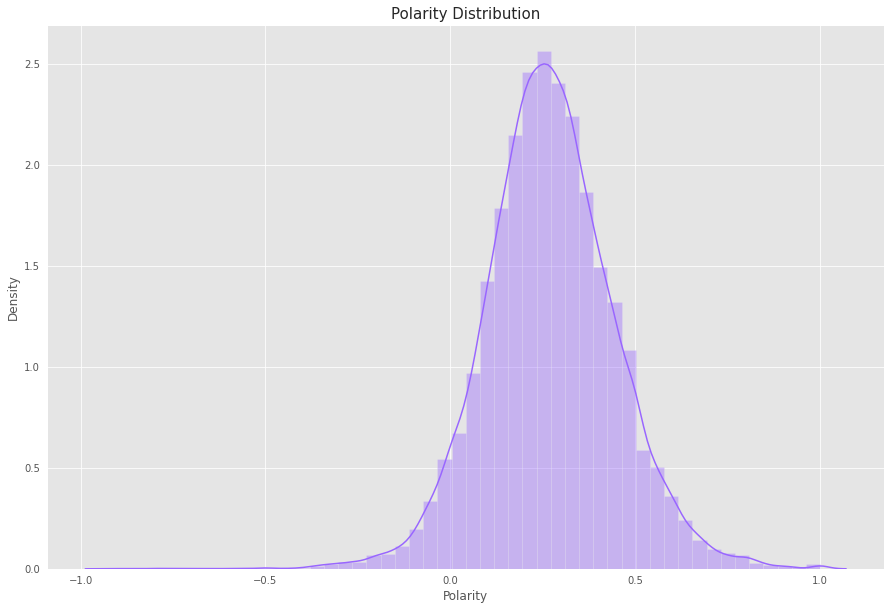

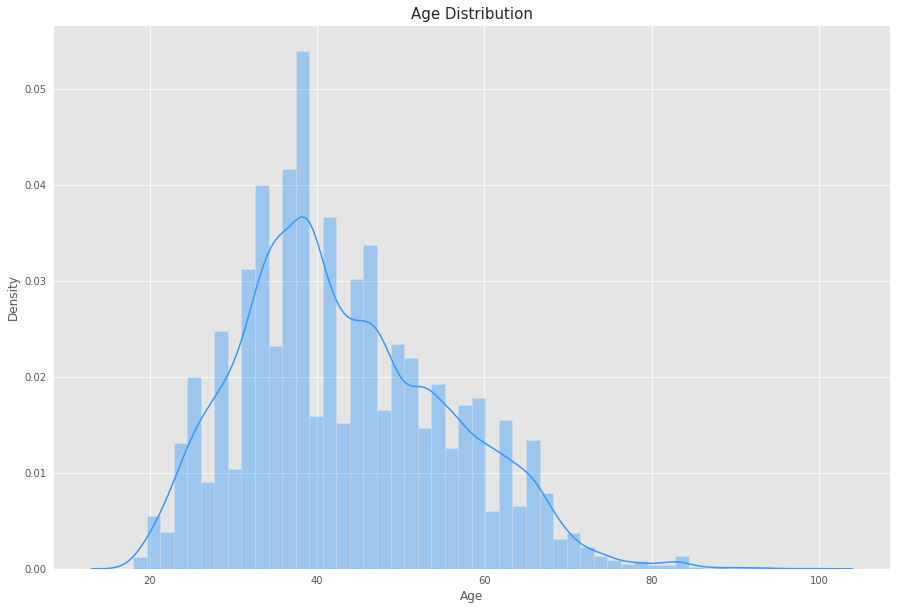

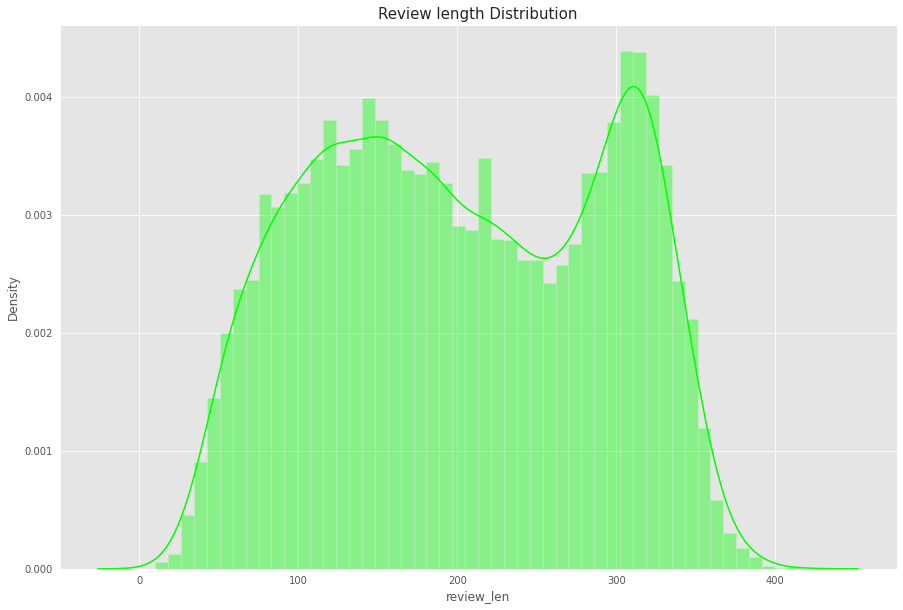

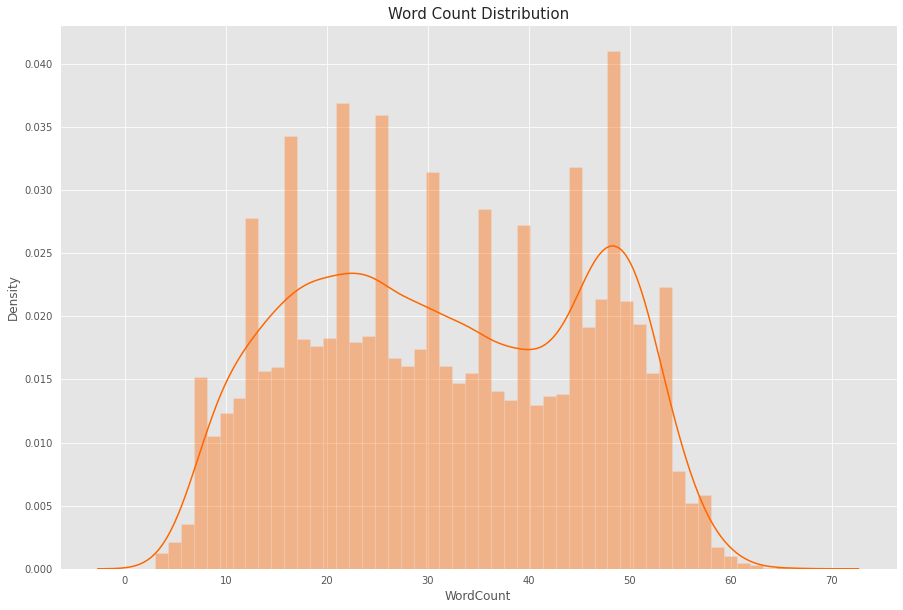

In [ ]:
features = ['Polarity', 'Age', 'review_len', 'WordCount']
titles = ['Polarity Distribution', 'Age Distribution', 'Review length Distribution', 'Word Count Distribution']
colors = ['#9966ff', '#3399ff', '#00ff00', '#ff6600']

for feature, title, color in zip(features, titles, colors): 
    sns.distplot(x=df[feature], bins=50, color=color)
    plt.title(title, size=15)
    plt.xlabel(feature)
    plt.show()

1. **Vast majority of the sentiment polarity scores are greater than zero, means most of them are pretty positive.**
2. **Most reviewers are in their 30s to 40s.**

## Distribution of review ratings

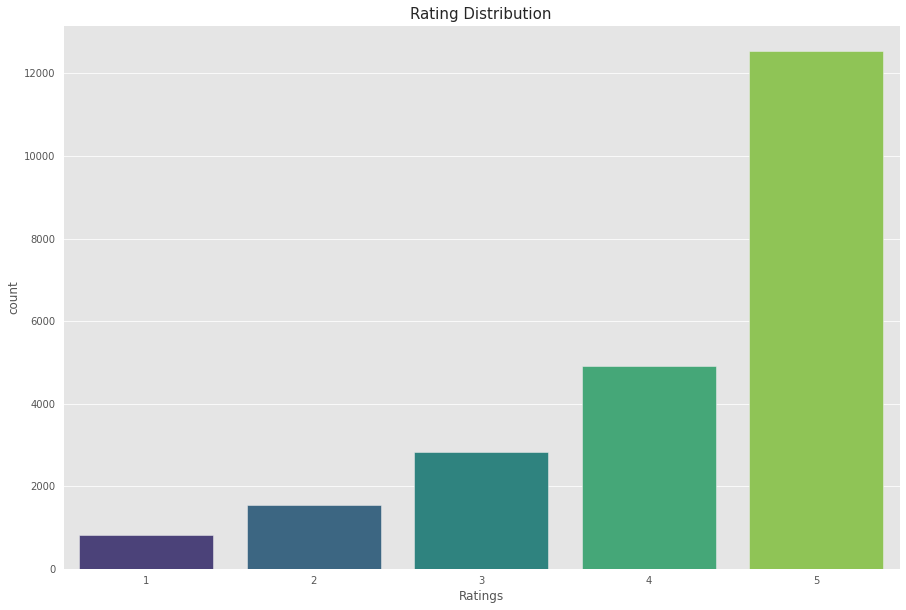

In [ ]:
sns.countplot(x = 'Rating', palette='viridis', data=df)
plt.title('Rating Distribution', size=15)
plt.xlabel('Ratings')
plt.show()

**The ratings are in align with the polarity score, that is, most of the ratings are pretty high at 4 or 5 ranges.**

## Distribution by Division Name

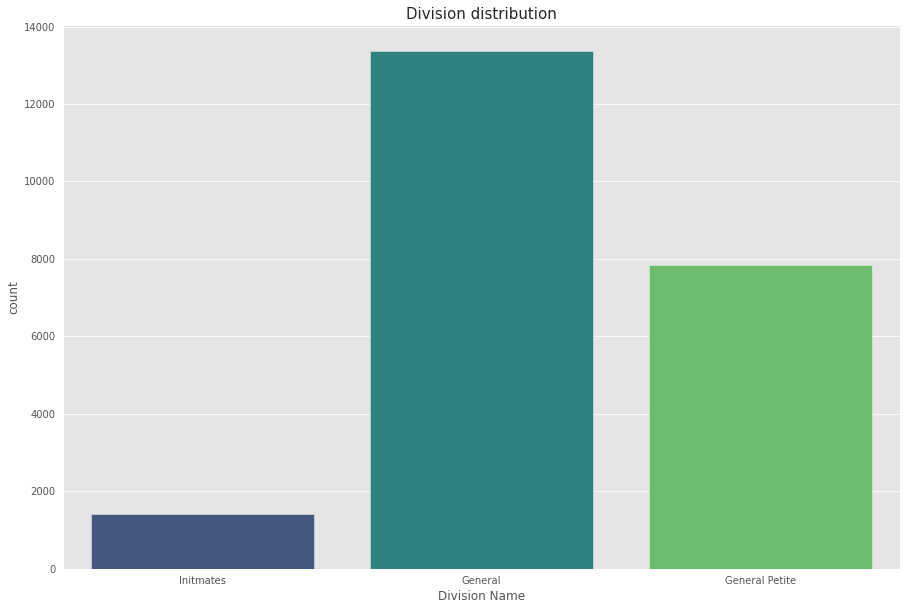

In [ ]:
sns.countplot(x='Division Name', palette='viridis', data=df)
plt.title('Division distribution', size=15)
plt.show()

**General division has the most number of reviews, and Initmates division has the least number of reviews.**

## Distribution by Department Name

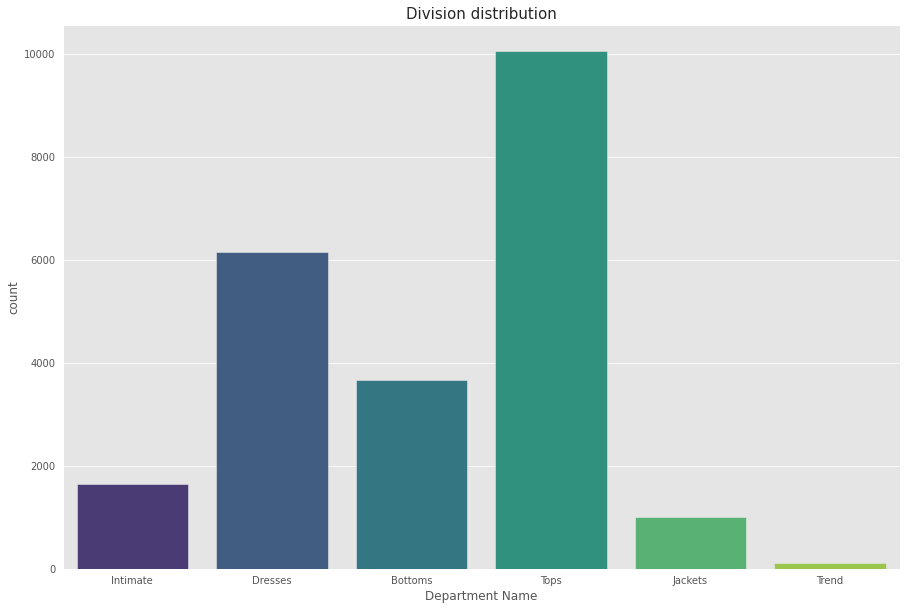

In [ ]:
sns.countplot(x='Department Name', palette='viridis', data=df)
plt.title('Division distribution', size=15)
plt.show()

**Tops department has the most number of reviews, and trend department has the least number of reviews.**

## Distribution of Class

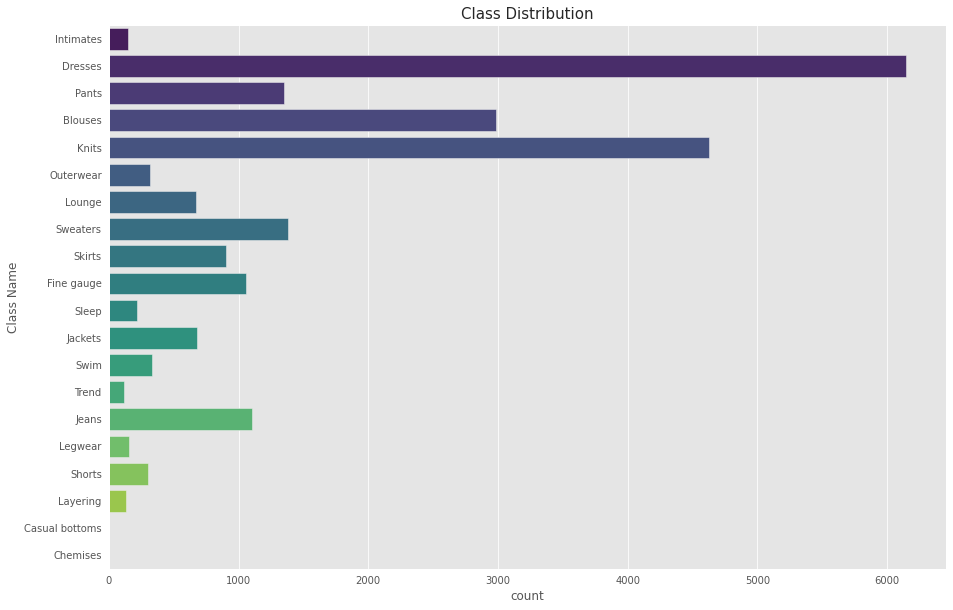

In [ ]:
sns.countplot(y='Class Name', palette='viridis', data=df)
plt.title('Class Distribution', size=15)
plt.show()

## Unigrams, Bigrams and Trigrams

Now we come to “Review Text” feature, before explore this feature, we need to extract N-Gram features. N-grams are used to describe the number of words used as observation points, e.g., unigram means singly-worded, bigram means 2-worded phrase, and trigram means 3-worded phrase. In order to do this, we use scikit-learn’s [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) function.

First, it would be interesting to compare unigrams before and after removing stop words.

In [ ]:
def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):
    vec = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    common_words = words_freq[:n]
    words = []
    freqs = []
    for word, freq in common_words:
        words.append(word)
        freqs.append(freq)
        
    df = pd.DataFrame({'Word': words, 'Freq': freqs})
    return df

In [ ]:
stop_words = None
n = 20
unigrams = get_top_ngrams(df['Input'], (1, 1), stop_words, n)
bigrams = get_top_ngrams(df['Input'], (2, 2), stop_words, n)
trigrams = get_top_ngrams(df['Input'], (3, 3), stop_words, n)

In [ ]:
stop_words = 'english'
n = 20
unigrams_st = get_top_ngrams(df['Input'], (1, 1), stop_words, n)
bigrams_st = get_top_ngrams(df['Input'], (2, 2), stop_words, n)
trigrams_st = get_top_ngrams(df['Input'], (3, 3), stop_words, n)

## Unigrams Distribution

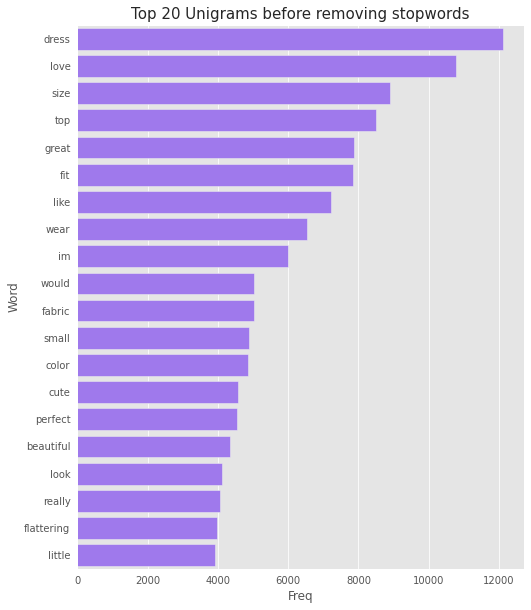

In [ ]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[0], data=unigrams)
plt.title('Top 20 Unigrams before removing stopwords', size=15)
plt.show()

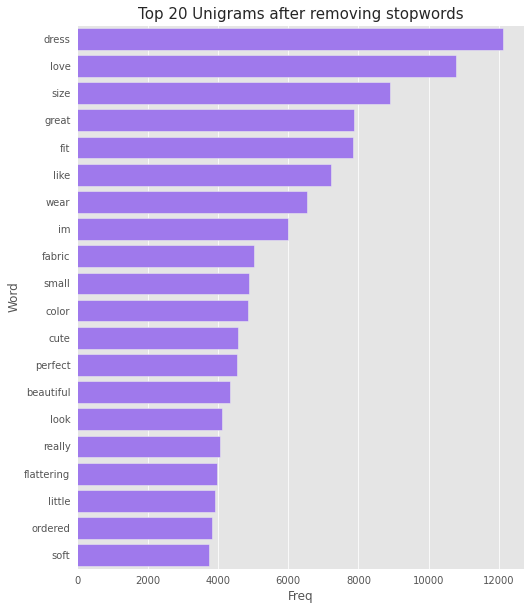

In [ ]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[0], data=unigrams_st)
plt.title('Top 20 Unigrams after removing stopwords', size=15)
plt.show()

## Bigrams Distribution

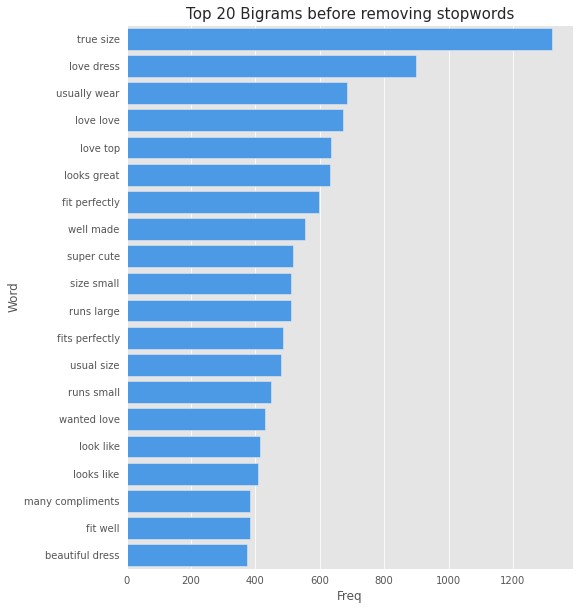

In [ ]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[1], data=bigrams)
plt.title('Top 20 Bigrams before removing stopwords', size=15)
plt.show()

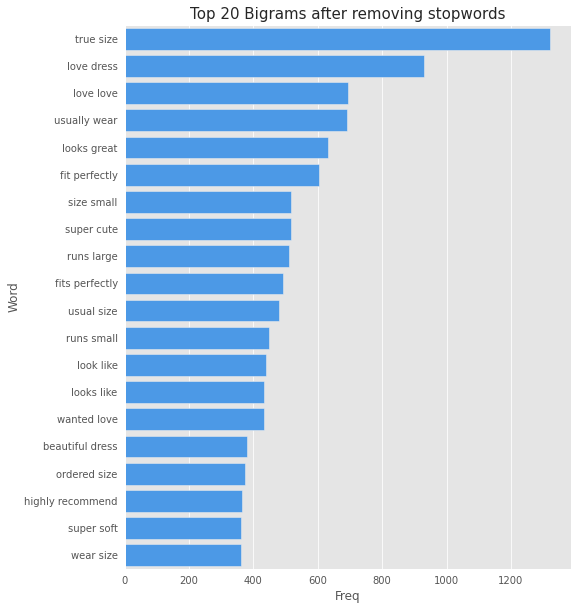

In [ ]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[1], data=bigrams_st)
plt.title('Top 20 Bigrams after removing stopwords', size=15)
plt.show()

## Trigrams Distribution

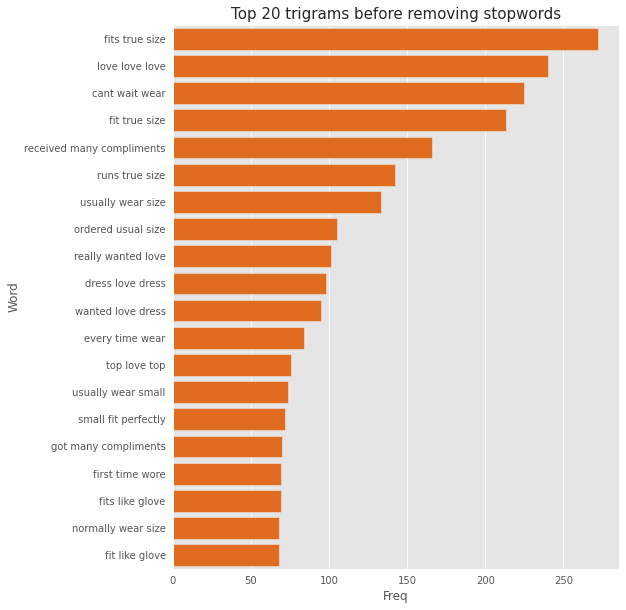

In [ ]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[3], data=trigrams)
plt.title('Top 20 trigrams before removing stopwords', size=15)
plt.show()

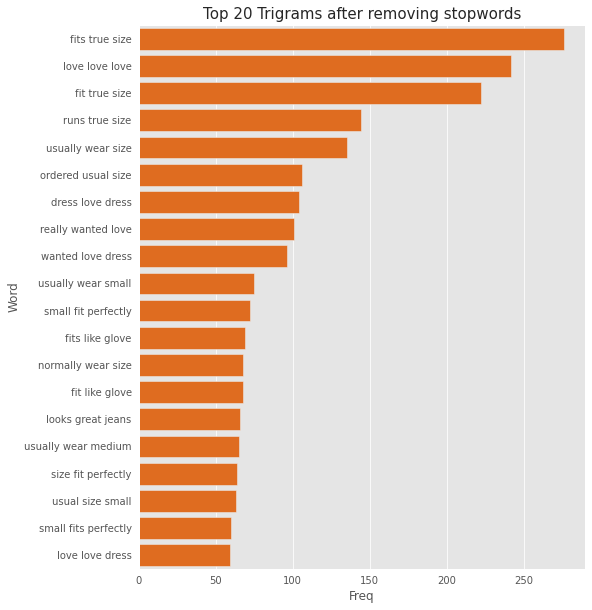

In [ ]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[3], data=trigrams_st)
plt.title('Top 20 Trigrams after removing stopwords', size=15)
plt.show()

## Part-of-Speech Tagging (POS)

Part-Of-Speech Tagging (POS) is a process of assigning parts of speech to each word, such as noun, verb, adjective, etc

I am using a simple TextBlob API to dive into POS of our “Review Text” feature in our data set, and visualize these tags.

In [ ]:
!python -m textblob.download_corpora
blob = TextBlob(str(df['Input']))
pos_df = pd.DataFrame(blob.tags, columns=['word', 'pos'])
#top_pos = pd.DataFrame(pos_df['pos'].value_counts(), columns=['pos', 'count'])
top_pos = pos_df['pos'].value_counts()

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


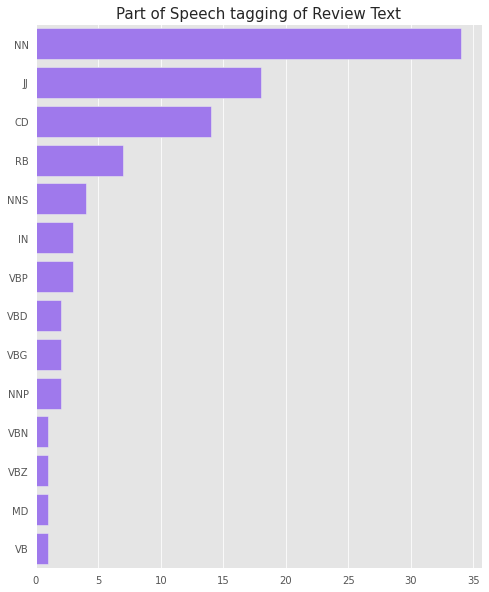

In [ ]:
plt.figure(figsize=(8, 10))
sns.barplot(y=top_pos.index, x=top_pos.values, color=colors[0])
plt.title('Part of Speech tagging of Review Text', size=15)
plt.show()

## Department name v/s Sentiment Polarity

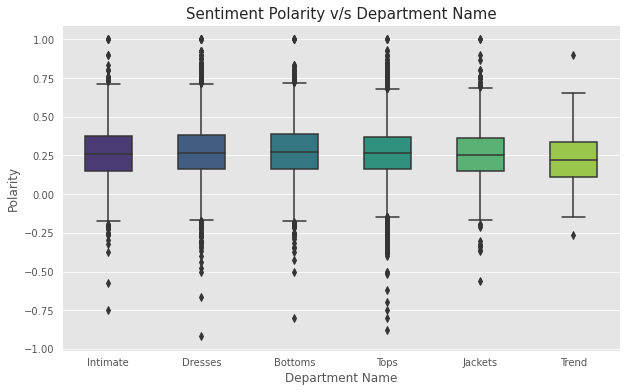

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department Name', y='Polarity', width=0.5, palette='viridis', data=df)
plt.title('Sentiment Polarity v/s Department Name', size=15)
plt.show()

The highest sentiment polarity score was achieved by all of the six departments except Trend department, and the lowest sentiment polarity score was collected by Tops department. And the Trend department has the lowest median polarity score. If you remember, the Trend department has the least number of reviews. This explains why it does not have as wide variety of score distribution as the other departments.

## Departments Name v/s Rating

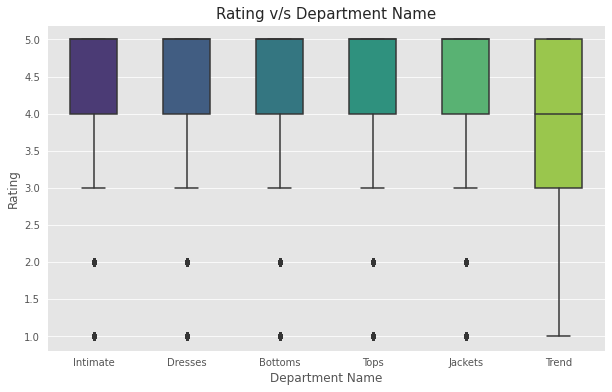

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department Name', y='Rating', width=0.5, palette='viridis', data=df)
plt.title('Rating v/s Department Name', size=15)
plt.show()

Except Trend department, all the other departments’ median rating were 5. Overall, the ratings are high and sentiment are positive in this review data set.

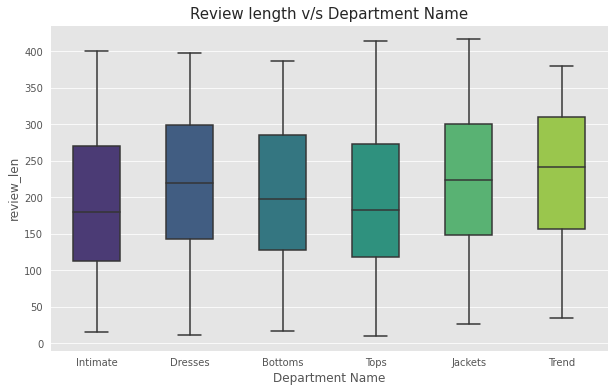

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department Name', y='review_len', width=0.5, palette='viridis', data=df)
plt.title('Review length v/s Department Name', size=15)
plt.show()

The median review length of Tops & Intimate departments are relative lower than those of the other departments.

## Distribution of Sentiment polarity of reviews based on Recommendation

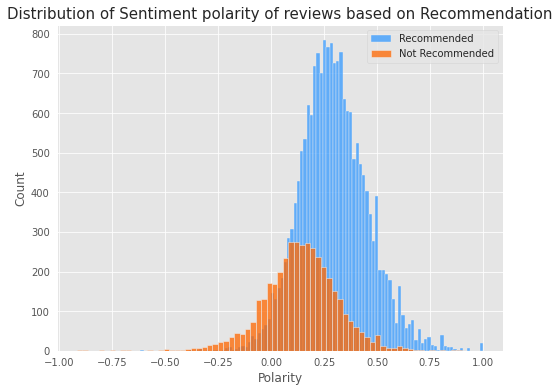

In [ ]:
recommended = df.loc[df['Recommended IND'] == 1, 'Polarity']
not_recommended = df.loc[df['Recommended IND'] == 0, 'Polarity']

plt.figure(figsize=(8, 6))
sns.histplot(x=recommended, color=colors[1], label='Recommended')
sns.histplot(x=not_recommended, color=colors[3], label='Not Recommended')
plt.title('Distribution of Sentiment polarity of reviews based on Recommendation', size=15)
plt.legend()
plt.show()

**It is obvious that reviews have higher polarity score are more likely to be recommended.**

## Distribution of Rating of reviews based on Recommendation

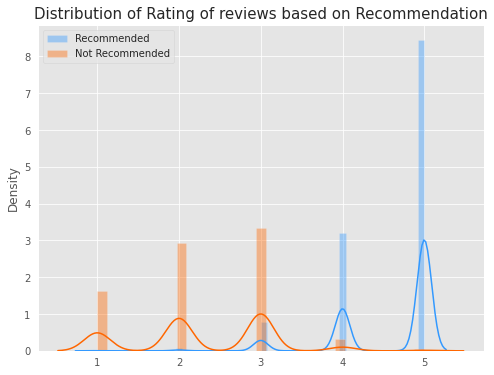

In [ ]:
recommended = df.loc[df['Recommended IND'] == 1, 'Rating']
not_recommended = df.loc[df['Recommended IND'] == 0, 'Rating']

plt.figure(figsize=(8, 6))
sns.distplot(x=recommended, color=colors[1], label='Recommended', )
sns.distplot(x=not_recommended, color=colors[3], label='Not Recommended')
plt.title('Distribution of Rating of reviews based on Recommendation', size=15)
plt.legend()
plt.show()

## Distribution of Review length of reviews based on Recommendation

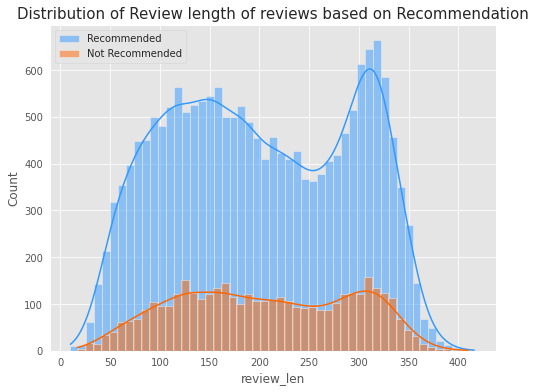

In [ ]:
recommended = df.loc[df['Recommended IND'] == 1, 'review_len']
not_recommended = df.loc[df['Recommended IND'] == 0, 'review_len']

plt.figure(figsize=(8, 6))
sns.histplot(x=recommended, color=colors[1], kde=True, label='Recommended', binwidth=8)
sns.histplot(x=not_recommended, color=colors[3], kde=True, label='Not Recommended', binwidth=8)
plt.title('Distribution of Review length of reviews based on Recommendation', size=15)
plt.legend()
plt.show()

**Recommended reviews tend to be lengthier than those of not recommended reviews.**

## 2D Density jointplot of rating and sentiment polarity

<Figure size 576x576 with 0 Axes>

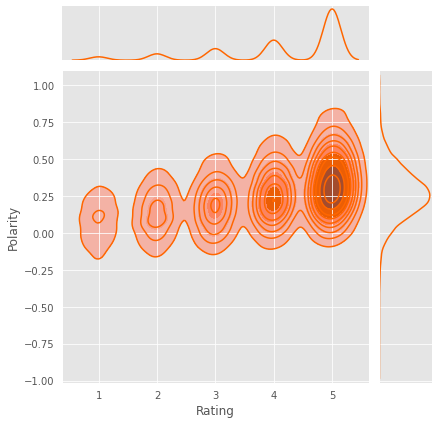

In [ ]:
plt.figure(figsize=(8, 8))
g = sns.jointplot(x='Rating', y='Polarity', kind='kde', color=colors[3], data=df)
g.plot_joint(sns.kdeplot, fill=True, color=colors[3], zorder=0, levels=6)

plt.show()

## 2D Density jointplot of age and sentiment polarity

<Figure size 720x576 with 0 Axes>

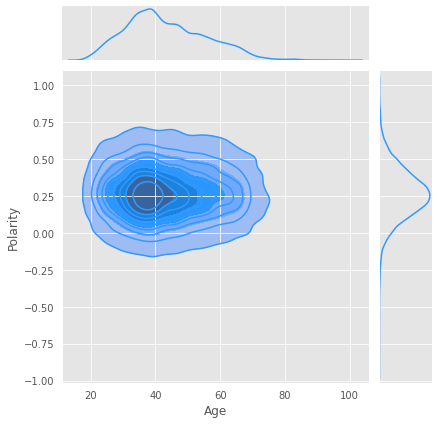

In [ ]:
plt.figure(figsize=(10, 8))
g = sns.jointplot(x='Age', y='Polarity', kind='kde', color=colors[1], data=df)
g.plot_joint(sns.kdeplot, fill=True, color=colors[1], zorder=0, levels=6)
plt.show()

**There were few people who gave very positive or very negative reviews. People who give neutral to positive reviews are more likely to be in their 30s. Probably people at these age are likely to be more active.**

## Distribution of text of rating by

In [ ]:
def cycle_groups(person):
   
    if person >=10 and person <30:
        return "Youth"
    elif person>=30 and person <50:
        return "Adult"
    else:
        return "Senior"

In [ ]:
df["Age Category"]= df["Age"].apply(cycle_groups)

In [ ]:
df["Age Category"].value_counts()

Adult     13250
Senior     6553
Youth      2839
Name: Age Category, dtype: int64

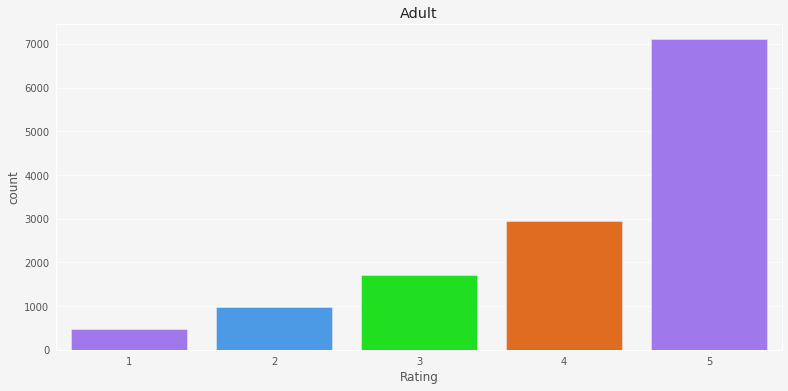

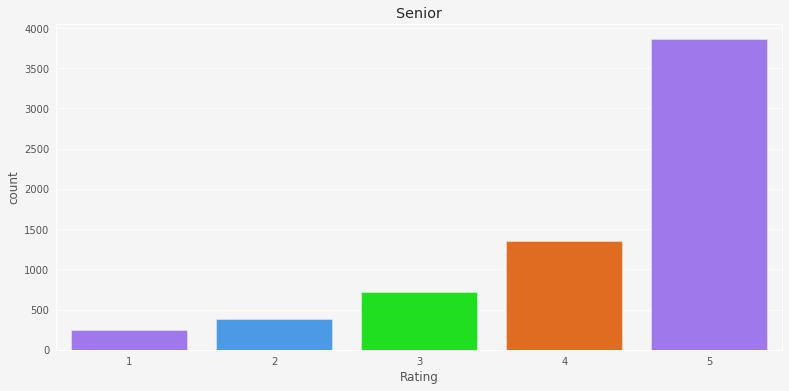

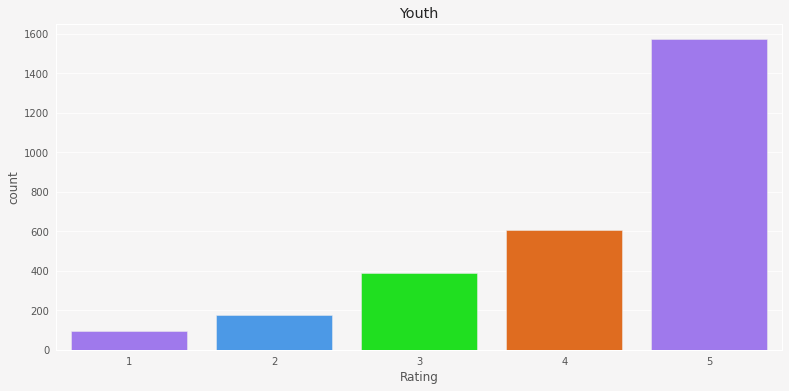

In [ ]:
for ratings in range(0,3):
    fig = plt.figure(figsize=(13,6))
    plt.subplot(3,1,1+ratings)
    plt.yticks([])
    values_uniques = list(df["Age Category"].unique())
    specific_value= df[df["Age Category"]==values_uniques[ratings]]
    ax = plt.axes()
    sns.countplot(specific_value["Rating"], palette=colors)
    plt.title(values_uniques[ratings])
    fig.patch.set_facecolor("#f6f5f5")
    ax.set_facecolor("#f6f5f5")


In [ ]:
round(df.groupby("Age Category")["review_len"].describe(),2)

count    mean    std   min    25%    50%    75%    max
Age Category                                                          
Adult         13250.0  202.13  89.48  12.0  127.0  197.0  285.0  416.0
Senior         6553.0  202.30  91.75  10.0  124.0  197.0  289.0  414.0
Youth          2839.0  198.32  86.64  12.0  126.0  192.0  278.0  383.0

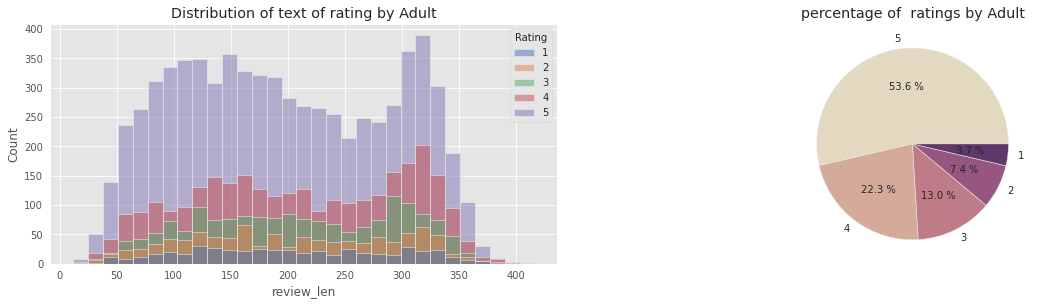

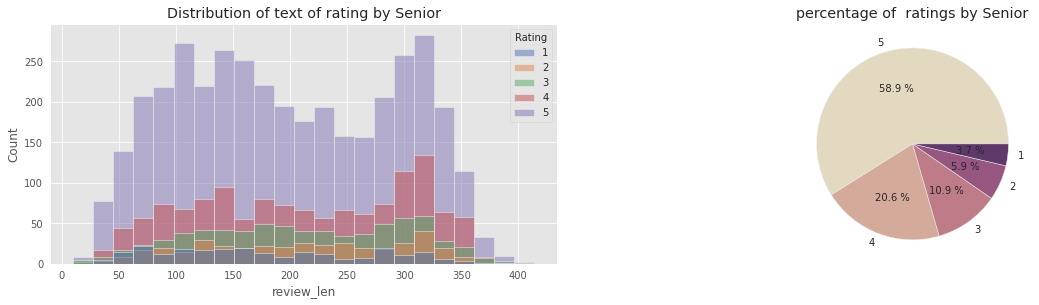

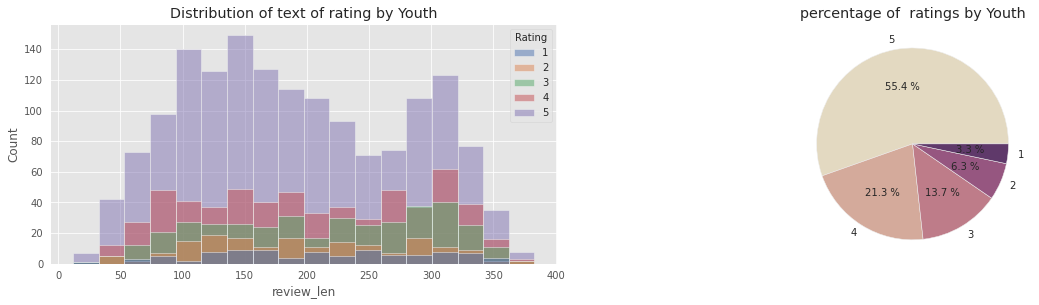

In [ ]:
impares = list(range(1,6,2))
pares = list(range(2,7,2))


for age in range(0,3):
    plt.figure(figsize=(20,15))
    plt.subplot(3,2,impares[age])
    list_age_value = list(df["Age Category"].unique())
    age_value = list_age_value[age]
    dataset = df[df["Age Category"]==age_value]
    impares = list(range(1,6,2))
    pares = list(range(2,7,2))
    sns.histplot(x="review_len", data=dataset, hue="Rating", palette="deep")
    plt.title("Distribution of text of rating by " + str(age_value))
    plt.subplot(3,2,pares[age])
    
    range_age = list(df["Age Category"].unique())
    age_value = range_age[age]
    dataset = df[df["Age Category"]==age_value]
    ratings = [5,4,3,2,1]
    color = sns.color_palette("ch:s=-.2,r=.6")

    target = dataset["Rating"].value_counts()
    values = target.values



 
    plt.pie(values, labels=ratings, colors=color,autopct="%0.1f %%");
    plt.title("percentage of  ratings by " + str(age_value))

#### From the percentage pie chart it is clear that percentage of Senior people who have rated below 3 is less as compared to Adults and Youth. Adult and Youth have provided more feedback thus their reviews can be further analyzed to build models on it. 

## **Network Graph Analysis**

**https://paperswithcode.com/paper/generalized-word-shift-graphs-a-method-for**

The Shifterator package provides functionality for constructing word shift graphs, vertical bart charts that quantify which words contribute to a pairwise difference between two texts and how they contribute. By allowing you to look at changes in how words are used, word shifts help you to conduct analyses of sentiment, entropy, and divergence that are fundamentally more interpretable.



In [ ]:
!pip install scattertext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import scattertext as st
import spacy
from scipy.stats import rankdata
from IPython.display import IFrame
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
import matplotlib.pyplot as plt
%matplotlib inline 

### Let's visualize the corpus using Scattertext

The x-axis indicates the rank of a word or bigram in the set of positive reviews, and the y-axis negative reviews.

Ranks are determined using "dense" ranking, meaning the most frequent terms, regardless of ties, are given rank 1, the next most frequent terms, regardless of ties, are given rank 2, etc.

It appears that terms more associated with a class are a further distance from the diagonal line between the lower-left and upper-right corners.  Terms are colored according to this distance.  We'll return to this in a bit.

Scattertext selectively labels points in such a way as to prevent labels from overlapping other elements of the graph. Mouse-over points and term labels for a preview, and click for a key-word in context view.

References:
* Jason S. Kessler. Scattertext: a Browser-Based Tool for Visualizing how Corpora Differ. ACL System Demonstrations. 2017.

In [ ]:
df['Rating'] = df['Rating'].map({5:"Positive", 4:"Positive", 3:"Neutral", 2:"Negative", 1:"Negative"})

In [ ]:
rdf = st.SampleCorpora.RottenTomatoes.get_data()
rdf['category_name'] = rdf['category'].apply(lambda x: {'plot': 'Plot', 'rotten': 'Negative', 'fresh': 'Positive'}[x])
print(rdf.category_name.value_counts())
rdf[['text', 'movie_name', 'category_name']].head()

Positive    2455
Negative    2411
Plot         156
Name: category_name, dtype: int64


text       movie_name  \
0  A senior at an elite college (Katie Holmes), a...          abandon   
1  Will Lightman is a hip Londoner who one day re...      about_a_boy   
2  Warren Schmidt (Nicholson) is forced to deal w...    about_schmidt   
3  An account of screenwriter Charlie Kaufman's (...       adaptation   
4  Ali G unwittingly becomes a pawn in the evil C...  ali_g_indahouse   

  category_name  
0          Plot  
1          Plot  
2          Plot  
3          Plot  
4          Plot

In [ ]:
corpus = (st.CorpusFromPandas(rdf, 
                              category_col='category_name', 
                              text_col='text',
                              nlp = st.whitespace_nlp_with_sentences)
          .build())
corpus.get_term_freq_df().to_csv('term_freqs.csv')
unigram_corpus = corpus.get_unigram_corpus()
posnegcorpus = corpus.remove_categories(['Plot'])
unigram_posnegcorpus = posnegcorpus.get_unigram_corpus()


In [ ]:
html = st.produce_scattertext_explorer(
    corpus,
    category='Positive',
    not_categories=['Negative'],
    sort_by_dist=False,
    metadata=rdf['movie_name'],
    term_scorer=st.RankDifference(),
)
HTML(html)

As shown in graph negative frequency terms are more prominent. Visualizations were made using Scattertext. Using following paper 

The Github repository for talk is at [https://github.com/JasonKessler/PuPPyTalk](https://github.com/JasonKessler/PuPPyTalk). 

#### **Data Cleaning and Preprocessing**

The Input data contains unclean data.

To improve performance of model, lower casing, punctuation removal stop words removal is performed as part of preprocessing.

#### Data processing functions 

In [ ]:
#### Lower Casing
def lowerCasing(total_dataset):
  return total_dataset.apply(lambda x: " ".join(x.lower() for x in x.split()))


#### Punctuation Removal
def removePunctuation(data):
  return data.str.replace('[^\w\s]','')


#### Identifying and Removing Stop Words
def removeStopWords(data):
  stop_words = stopwords.words('english')
  sw_list = ['ur','u','1','2','3','4','5','6','7','8','9','0','im']
  stop_words.extend(sw_list)
  return data.apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))


#### output column
def make_ratings_binary(y):
  y = y.apply(lambda x : 1 if x == 5 else 0)
  return y


## text cleaning
#Preprovessing function to remove tags, html, special characters,and etc
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)
    
def preprocess_text(inputSentence):

    # Removing html tags
    sentence = remove_tags(inputSentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

     # Removing email address 
    sentence = re.sub(r'[^\s]+@[^*()\s]+', ' ', sentence)

     # Removing http address 
    sentence = re.sub(r'(http|https)://[^\s]*', ' ', sentence)

     # Removing dollar address 
    sentence = re.sub(r'[$]+', ' ', sentence)
    
    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
df = df_womens_clothing_dataset.copy()

In [ ]:
df['Input'] = lowerCasing(df['Input'])

In [ ]:
df['Input'] = removePunctuation(df['Input'])

In [ ]:
df['Input'] = removeStopWords(df['Input'])

In [ ]:
df.Input = df.Input.apply(lambda x : preprocess_text(x))

#### **Define features and labels**



In [ ]:
features = df.Input.apply(lambda x: ''.join(x))

features[6]

'cagrcoal shimmer fun aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turns mathced everythiing trying prefectly little baggy hte xs hte msallet size bummer petite decided jkeep though said matvehd everything ejans pants skirts waas trying kept oops'

In [ ]:


labels = make_ratings_binary(df['Rating'])
labels.shape

(22642,)

In [ ]:
vectorizer = CountVectorizer(max_features=25000, lowercase=True,analyzer = "word")

vectors = vectorizer.fit_transform(features)
print(vectorizer.get_feature_names())
print(vectors.toarray())

vectors.toarray().shape

['00', '000', '002first', '00p', '00p0p', '00p0rxxsxs', '02', '025', '02xs', '03', '03dd', '04', '0406', '0dd', '0in', '0p', '0pand', '0petite', '0r', '0regular', '0s', '0verall', '0xs', '10', '100', '1000', '10000', '1000000', '100105', '100105lbs', '100lb', '100lbs', '100s', '101', '1010', '1012', '1014', '1015', '102', '102lbs', '103', '10311', '103lb', '103lbs', '104', '104lbs', '105', '105lb', '105lbs', '105lbs32c', '106', '106108', '106lbs', '107', '107lb', '107lbs', '107pound', '108', '108113', '108lbs', '109', '109111', '109lbs', '10kept', '10l', '10lbs', '10m', '10m34c', '10mths', '10p', '10s', '10th', '10the', '10which', '10x', '10yr', '11', '110', '110112', '110115', '110115lbs', '110lb', '110lbs', '111', '111lbs', '112', '112115lbs', '112lb', '112lbs', '112lbsshirt', '112lbswith', '112llbs', '113', '113lbs', '114', '114lb', '114lbs', '115', '115120', '115ish', '115lb', '115lbs', '115lbsordered', '115llbs', '116', '116118', '116bs', '116ibs', '116lb', '116lbs', '117', '117bl

(22642, 19974)

#### splitting model in train and test split so that model is fit only on trainng dataset and test dataset is used for calculating accuracy

#### **Train Test and Validation split, Hyper parameter Tuning, 5 fold cross validation using GridsearchCV**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(vectors.toarray(), labels, test_size=0.3, random_state=1)
## splitting test dataset in half one for validation tests and other for actual test
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=1)

In [ ]:
for dataset in [y_train, y_val, y_test]:
  print(round(len(dataset)/len(labels), 2))

0.7
0.15
0.15


In [ ]:
for dataset in [x_train, x_val, x_test]:
  print(len(dataset))

15849
3396
3397


In [ ]:
for dataset in [y_train, y_val, y_test]:
  print(len(dataset))

15849
3396
3397


In [ ]:
print(x_train.shape)

(15849, 19974)


In [ ]:
print(x_val.shape)

(3396, 19974)


In [ ]:
print(x_test.shape)

(3397, 19974)


#### **Important Functions**





In [ ]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    endy = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    f1score = round(f1_score(labels, pred), 3)
    print('{} -- Accuracy: {} | Precision: {} | Recall: {} | F1Score: {} | Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   f1score,
                                                                                   round((endy - start)*1000, 1)))

In [ ]:
### k fold cross validation to choose hyper parameters correctly.

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

# **Methods Used**

#### **Random Forest**

In [ ]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [ 250],
    'max_depth': [ 4, 8]
}

rf_model = GridSearchCV(rf, parameters, cv=5)
rf_model.fit(x_train, y_train)

print_results(rf_model)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 250}

0.562 (+/-0.005) for {'max_depth': 4, 'n_estimators': 250}
0.641 (+/-0.012) for {'max_depth': 8, 'n_estimators': 250}


In [ ]:
rf_model.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=250)

In [ ]:
evaluate_model('RF', rf_model, x_val, y_val)

RF -- Accuracy: 0.643 | Precision: 0.607 | Recall: 0.997 | F1Score: 0.755 | Latency: 342.4ms


In [ ]:
evaluate_model('RF', rf_model, x_test, y_test)

RF -- Accuracy: 0.648 | Precision: 0.615 | Recall: 0.996 | F1Score: 0.761 | Latency: 377.4ms


#### **Create word vectors and word embeddings**



#### Word vectors created with input length 60. All the records padded with input length 60.

#### Different pretrained and trained word embeddings were implemented like word2vec, fastText and glove. Finally glove model is selected based on accuracy comparison. 

In [ ]:
x = [d.split() for d in df['Input']]
y = make_ratings_binary(df['Rating'])

#### Train Test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, shuffle=True, random_state = 1)
## keras tockenizer takes words from vocabulary as input and then converts it to sequence of numbers
tokenizer = Tokenizer()

## learn vocabulary
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)




In [ ]:
## tokenizer creates word dictionary with common words ranked 1st
vocab = tokenizer.word_index

In [ ]:
## find vocab size = unique number of words
len(tokenizer.word_index)

16547

In [ ]:
## adding 1 to vocabulary to add 0 as we pad it with 0 
INPUT_VOAB_LEN = len(tokenizer.word_index)+1

(array([ 11.,  81., 249., 427., 512., 611., 670., 719., 762., 718., 761.,
        759., 649., 700., 641., 630., 589., 578., 561., 526., 598., 716.,
        892., 923., 693., 469., 234., 124.,  32.,  14.]),
 array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24., 26.,
        28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50., 52.,
        54., 56., 58., 60., 62.]),
 <a list of 30 Patch objects>)

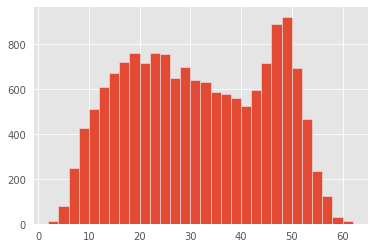

In [ ]:
plt.hist([len(x_train) for x_train in x_train], bins =30)

In [ ]:
#### As per histomram the max 60 words are present in the messages, so we can keep maxlen = 60
array = np.array([len(x_train) for x_train in x_train])
len(array[array>60])

## As we have almost all sentences with 65 word count per sentence, truncate the sequence lenght with maxlen = 65

6

In [ ]:
input_length = 60
x_train = pad_sequences(x_train, maxlen=input_length)
x_train.shape

(15849, 60)

In [ ]:
x_test = pad_sequences(x_test, maxlen=input_length)
x_test.shape

(6793, 60)

In [ ]:
y_train.shape

(15849,)

In [ ]:
y_test.shape

(6793,)

#### **Common Functions LSTM and GRU**

In [ ]:
##### Common functionS


def show_performance_plot(mdl):
  #show the model accuracy
  plt.plot(mdl.history['acc'])
  plt.plot(mdl.history['val_acc'])

  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()
  #show model loss
  plt.plot(mdl.history['loss'])
  plt.plot(mdl.history['val_loss'])

  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()


def model_build(input_dim, output_dim, embedding_vectors, input_length, x_train, y_train): 

  model_LSTM = Sequential()

  # Add an Embedding layer (dense encoding) expecting input vocab of size VOAB_LEN, and
  # output embedding dimension of size 1DIM = 300 
  # input length = how long is each input x_train column size = 60
  model_LSTM.add(Embedding(input_dim = input_dim, output_dim = output_dim, weights = [embedding_vectors], input_length = input_length, trainable = False))

  # Add a LSTM layer with 128 internal units.
  model_LSTM.add(LSTM(128))

  # Add a Dense layer with 1 unit
  model_LSTM.add(Dense(1, activation='sigmoid'))

  # Compile the model
  model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

  model_LSTM.summary()


  model_LSTM_plt = model_LSTM.fit(
      x_train, 
      y_train, 
      validation_split=0.3, 
      epochs=100, 
      callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True)],
      verbose=1, 
      batch_size = 128
      )
  

  y_pred = (model_LSTM.predict(x_test) >= 0.5).astype(int)

  print("Accuracy : ")
  print(accuracy_score(y_test, y_pred))
  print(model_LSTM.evaluate(x_test, y_test))

  print(classification_report(y_test, y_pred))
  show_performance_plot(model_LSTM_plt)
  tf.keras.utils.plot_model(model_LSTM)


def model_build_GRU(input_dim, output_dim, embedding_vectors, input_length, x_train, y_train): 

  model_LSTM = Sequential()

  # Add an Embedding layer (dense encoding) expecting input vocab of size VOAB_LEN, and
  # output embedding dimension of size 1DIM = 300 
  # input length = how long is each input x_train column size = 60
  model_LSTM.add(Embedding(input_dim = input_dim, output_dim = output_dim, weights = [embedding_vectors], input_length = input_length, trainable = False))

  # Add a GRU layer with 256 internal units.
  model_LSTM.add(GRU(256, return_sequences=False, activation='tanh'))

  # Add a Dense layer with 1 unit
  model_LSTM.add(Dense(1, activation='sigmoid'))

  # Compile the model
  model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

  model_LSTM.summary()
 

  model_LSTM_plt = model_LSTM.fit(
      x_train, 
      y_train, 
      validation_split=0.3, 
      epochs=100, 
      callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True)],
      verbose=1, 
      batch_size = 128
      )

  y_pred = (model_LSTM.predict(x_test) >= 0.5).astype(int)

  print("Accuracy : ")
  print(accuracy_score(y_test, y_pred))
  print(model_LSTM.evaluate(x_test, y_test))

  print(classification_report(y_test, y_pred))
  show_performance_plot(model_LSTM_plt)
 


#### **LSTM and GRU**

In [ ]:
OUTPUT_DIM = 300

In [ ]:
import os
import numpy as np
# https://nlp.stanford.edu/projects/glove/
DIR = "/content/drive/MyDrive/SemesterTwo/IE7374/Project1/"

embeddings_index = {}

# Pre-trained Glove
#if option == 1:
with open("/content/drive/MyDrive/SemesterTwo/IE7374/Project1/glove.6B.300d.txt") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

In [ ]:
EMBEDDING_DIM = 300

print('Preparing embedding matrix.')

# prepare embedding matrix

embedding_matrix = np.zeros((INPUT_VOAB_LEN, EMBEDDING_DIM))
for word, i in vocab.items():

    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
print(embedding_matrix.shape)

In [ ]:
embedding_matrix.shape

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 300)           4964400   
                                                                 
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 5,184,177
Trainable params: 219,777
Non-trainable params: 4,964,400
_________________________________________________________________
Epoch 1/100
87/87 [==============================] - 9s 19ms/step - loss: 0.5457 - acc: 0.7278 - val_loss: 0.4834 - val_acc: 0.7754
Epoch 2/100
87/87 [==============================] - 1s 9ms/step - loss: 0.4678 - acc: 0.7853 - val_loss: 0.4667 - val_acc: 0.7905
Epoch 3/100
87/87 [======================

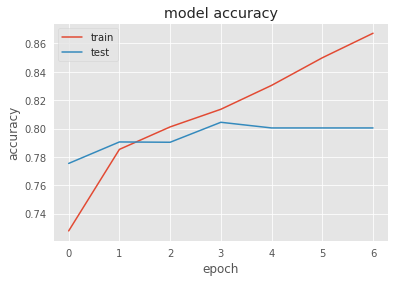

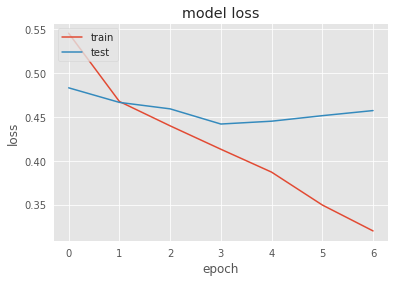

In [ ]:
model_build(INPUT_VOAB_LEN, OUTPUT_DIM, embedding_matrix, input_length, x_train, y_train)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 60, 300)           4964400   
                                                                 
 gru (GRU)                   (None, 256)               428544    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 5,393,201
Trainable params: 428,801
Non-trainable params: 4,964,400
_________________________________________________________________
Epoch 1/100
87/87 [==============================] - 4s 21ms/step - loss: 0.5658 - acc: 0.7085 - val_loss: 0.5115 - val_acc: 0.7651
Epoch 2/100
87/87 [==============================] - 1s 15ms/step - loss: 0.4610 - acc: 0.7908 - val_loss: 0.4516 - val_acc: 0.7996
Epoch 3/100
87/87 [===================

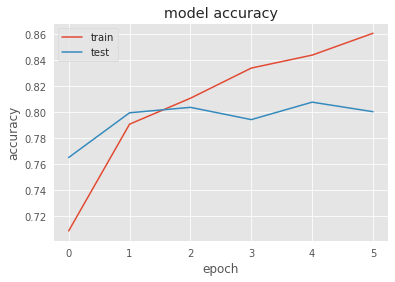

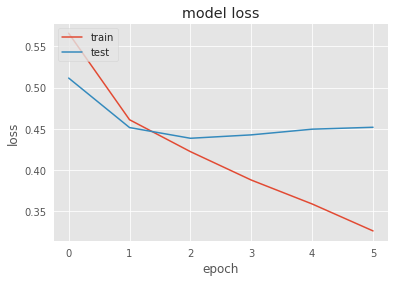

In [ ]:
 model_build_GRU(INPUT_VOAB_LEN, OUTPUT_DIM, embedding_matrix, input_length, x_train, y_train)

#### **BERT**

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import AutoTokenizer
checkpoint = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [ ]:
print(tokenizer.vocab)

{'auckland': 8666, 'dh': 28144, 'lifeboat': 23450, 'quarterfinal': 29380, 'sienna': 20210, 'step': 3357, '##sin': 11493, 'czech': 5569, 'dion': 19542, 'drunken': 15967, 'sci': 16596, '##rnik': 26437, '[unused978]': 983, 'impending': 17945, 'austrians': 28439, 'resurrection': 15218, 'disadvantaged': 27322, 'antenna': 13438, '##bari': 25990, 'crewe': 22188, 'southend': 26104, 'dominique': 18165, 'savannah': 10891, 'local': 2334, '##cute': 26869, '##rize': 25709, 'sided': 11536, 'pasadena': 18880, 'absorption': 16326, 'treasure': 8813, 'er': 9413, '##usions': 22016, '##ddling': 21814, 'intimately': 29024, 'lamp': 10437, 'wryly': 28325, 'leslie': 8886, '£2': 21853, 'historical': 3439, '##he': 5369, '##cion': 10446, 'ق': 1292, 'scarred': 21985, 'narration': 21283, 'album': 2201, 'sheds': 25999, '##¤': 29647, '411': 27517, '##ko': 3683, 'fatty': 19101, 'remake': 12661, 'calendar': 8094, 'id': 8909, 'doctor': 3460, 'wagner': 10304, 'nursery': 13640, '##gaard': 18839, 'pulmonary': 21908, 'sign

In [ ]:
#size of vocabulary
print(len(tokenizer.vocab))

30522


In [ ]:
sentence = "I like NLP"
print(sentence)

# bert model uses word piece tokenization GPT2 uses byte pair encoding tokenization
tokens = tokenizer.tokenize(sentence)
print(tokens)


ids = tokenizer.encode(sentence)
print(ids)
print(tokenizer.decode(ids))

I like NLP
['i', 'like', 'nl', '##p']
[101, 1045, 2066, 17953, 2361, 102]
[CLS] i like nlp [SEP]


In [ ]:
df_bert = df[['Input','Rating']]

In [ ]:
df_bert.columns = ["text","label"]

In [ ]:
df_bert['label'] = make_ratings_binary(df_bert['label'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_bert.shape

(22642, 2)

In [ ]:
df_train = df_bert.head(20000)

df_validation = df_train.tail(5000)
df_train = df_train.head(15000)
df_test = df_bert.tail(22642)



In [ ]:
import torch
from transformers import AutoModelForSequenceClassification

## use GPU for faster runtime
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## for multiclass classification
num_labels = 2

model = (
    AutoModelForSequenceClassification.from_pretrained(
        checkpoint,
        num_labels = num_labels

    ).to(device))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
def bert_tokenize_function(batch):
  return tokenizer(batch["text"], padding = True, truncation=True)

In [ ]:
!pip install datasets
import datasets
from datasets import Dataset
train_dataset = Dataset.from_dict(df_train)
test_dataset = Dataset.from_dict(df_test)
validation_dataset = Dataset.from_dict(df_validation)

my_dataset_dict = datasets.DatasetDict({"train":train_dataset,"test":test_dataset, "validation":validation_dataset})

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
encoded_dataset_test = my_dataset_dict.map(bert_tokenize_function, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
encoded_dataset_test

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 15000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 22642
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 5000
    })
})

In [ ]:
encoded_dataset_test['train'][0]
    

{'text': '0 absolutely wonderful silky sexy comfortable',
 'label': 0,
 'input_ids': [101,
  1014,
  7078,
  6919,
  18848,
  7916,
  6625,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'token_type_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [ ]:
from transformers import trainer, TrainingArguments

batch_size = 8
logging_steps = len(encoded_dataset_test["train"])

In [ ]:
model_name =f"{checkpoint}-finetuned-model"


training_args = TrainingArguments(
    output_dir = model_name,
    num_train_epochs = 2,
    learning_rate = 2e-5,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    weight_decay = 0.01,
    evaluation_strategy = "epoch",
    disable_tqdm = False,
    logging_steps = logging_steps,
    log_level = "error",
    optim = 'adamw_torch'
)

In [ ]:

from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model = model,
                  args = training_args,
                  train_dataset = encoded_dataset_test['train'],
                  eval_dataset = encoded_dataset_test['validation'],
                  tokenizer = tokenizer)



In [ ]:
trainer.train()

In [ ]:
trainer.predict(encoded_dataset_test['test'])

In [ ]:
preds = trainer.predict(encoded_dataset_test['test'])
preds


In [ ]:
preds.predictions.shape

In [ ]:
def get_accuracy(preds):
  predictions = preds.predictions.argmax(axis=-1)
  labels = preds.label_ids
  accuracy = accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))
  return {'accuracy': accuracy}

In [ ]:
### training with get accuracy function added in Trainer

In [ ]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  compute_metrics=get_accuracy,
                  args=training_args, 
                  train_dataset=encoded_dataset_test["train"],
                  eval_dataset = encoded_dataset_test['validation'],
                  tokenizer=tokenizer)
trainer.train();

#### bert with batch size 16 run

In [ ]:
batch_size = 16
logging_steps = len(encoded_dataset_test["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size = batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )

In [ ]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  args=training_args, 
                  compute_metrics=get_accuracy,
                  train_dataset=encoded_dataset_test["train"],
                  eval_dataset = encoded_dataset_test['validation'],
                  tokenizer=tokenizer)
trainer.train();

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
trainer.evaluate()

{'eval_loss': 0.39968159794807434,
 'eval_accuracy': 0.832,
 'eval_runtime': 33.1689,
 'eval_samples_per_second': 150.743,
 'eval_steps_per_second': 9.437,
 'epoch': 2.0}

In [ ]:
trainer.save_model()

In [ ]:
model_name

'bert-base-uncased-finetuned-imdb'

In [ ]:
from transformers import pipeline
classifier = pipeline('text-classification', model=model_name)


In [ ]:
classifier('cloth unfit')

[{'label': 'LABEL_0', 'score': 0.9540241956710815}]

In [ ]:
classifier('fabric color is awesome')

[{'label': 'LABEL_1', 'score': 0.8859252333641052}]

#### Topic Modelling

In [ ]:
## taking dataset were rating is below 2
dataset = df_eda[(df_womens_clothing_dataset['Rating'] == 2)  | (df_womens_clothing_dataset['Rating'] ==1)]
dataset

Unnamed: 0  Clothing ID  Age                            Title  \
5               5         1080   49          Not for the very petite   
22             22         1077   31           Not what it looks like   
26             26          949   33              Huge disappointment   
33             33          949   36                             Mehh   
56             56          368   33                                0   
...           ...          ...  ...                              ...   
22564       23406         1082   68                     Disappointed   
22582       23424          854   58                 Extremely sheer!   
22585       23427          854   42                      Sheer shirt   
22595       23437         1104   59  Not typical of retailer quality   
22635       23478         1104   32                     Unflattering   

                                             Review Text  Rating  \
5      I love tracy reese dresses, but this one is no...       2   
22     First of all, this is not pullover styling. th...       2   
26     I have been waiting for this sweater coat to s...       2   
33     I ordered this 3 months ago, and it finally ca...       2   
56     I am pregnant and i thought this would be a gr...       2   
...                                                  ...     ...   
22564  I was very excited to find a fun and lightweig...       1   
22582  Before i ordered this i noted the other review...       2   
22585  What drew me to this shirt was the beautiful s...       2   
22595  This dress is so cute in the photo and fit tru...       2   
22635  I was surprised at the positive reviews for th...       1   

       Recommended IND  Positive Feedback Count   Division Name  \
5                    0                        4         General   
22                   0                        7         General   
26                   0                        0         General   
33                   0                        0         General   
56                   0                        3       Initmates   
...                ...                      ...             ...   
22564                0                        0         General   
22582                0                        0  General Petite   
22585                0                       65  General Petite   
22595                0                        2  General Petite   
22635                0                        0  General Petite   

      Department Name Class Name  \
5             Dresses    Dresses   
22            Dresses    Dresses   
26               Tops   Sweaters   
33               Tops   Sweaters   
56           Intimate  Intimates   
...               ...        ...   
22564         Dresses    Dresses   
22582            Tops      Knits   
22585            Tops      Knits   
22595         Dresses    Dresses   
22635         Dresses    Dresses   

                                                   Input  
5      petite love tracy reese dresses one petite 5 f...  
22     looks like first pullover styling side zipper ...  
26     huge disappointment waiting sweater coat ship ...  
33     mehh ordered 3 months ago finally came back or...  
56     0 pregnant thought would great sleep bra soft ...  
...                                                  ...  
22564  disappointed excited find fun lightweight whit...  
22582  extremely sheer ordered noted reviews said she...  
22585  sheer shirt drew shirt beautiful silver gold e...  
22595  typical retailer quality dress cute photo fit ...  
22635  unflattering surprised positive reviews produc...  

[2370 rows x 12 columns]

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = dataset['Input']
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['petite', 'love', 'tracy', 'reese', 'dresses', 'one', 'petite', 'feet', 'tall', 'usually', 'wear', 'brand', 'dress', 'pretty', 'package', 'lot', 'dress', 'skirt', 'long', 'full', 'overwhelmed', 'small', 'frame', 'stranger', 'alterations', 'shortening', 'narrowing', 'skirt', 'would', 'take']


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.016*"top" + 0.014*"like" + 0.011*"fabric" + 0.011*"one" + 0.009*"im" + '
  '0.009*"quality" + 0.008*"would" + 0.007*"back" + 0.007*"wear" + '
  '0.007*"material"'),
 (1,
  '0.019*"dress" + 0.017*"like" + 0.016*"size" + 0.013*"fabric" + 0.010*"wear" '
  '+ 0.009*"fit" + 0.009*"quality" + 0.009*"really" + 0.008*"top" + '
  '0.008*"looks"'),
 (2,
  '0.026*"dress" + 0.019*"like" + 0.012*"fit" + 0.011*"love" + 0.010*"wanted" '
  '+ 0.009*"top" + 0.009*"fabric" + 0.008*"material" + 0.008*"ordered" + '
  '0.008*"great"'),
 (3,
  '0.016*"fit" + 0.016*"shirt" + 0.015*"short" + 0.015*"sweater" + 0.013*"top" '
  '+ 0.012*"would" + 0.011*"back" + 0.011*"like" + 0.008*"wear" + '
  '0.008*"size"'),
 (4,
  '0.012*"top" + 0.011*"small" + 0.011*"looks" + 0.011*"like" + 0.010*"back" + '
  '0.010*"love" + 0.009*"fabric" + 0.009*"quality" + 0.009*"fit" + '
  '0.008*"dress"'),
 (5,
  '0.013*"small" + 0.012*"top" + 0.012*"would" + 0.012*"fit" + 0.012*"fabric" '
  '+ 0.011*"dress" + 0.011*"ordered"

In [ ]:
!pip install pyLDAvis 

import pyLDAvis
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis


# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))



# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    """
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)"""

#pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=1d964bab09da2b4dad9cb1e16bc3ba2c3bf250c83f826c51e56d01f6dd291d54
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.018074 -0.003761       1        1  17.888256
1      0.011298 -0.009240       2        1  15.390884
0     -0.039650 -0.000061       3        1  12.640130
8      0.024876 -0.034944       4        1   9.850463
5      0.003751 -0.005709       5        1   8.907161
7     -0.056663 -0.003223       6        1   8.312847
9     -0.020132 -0.064167       7        1   7.978225
3     -0.030900  0.033618       8        1   7.394159
6      0.094626  0.010880       9        1   6.002324
4     -0.005280  0.076607      10        1   5.635551, topic_info=        Term         Freq        Total Category  logprob  loglift
4      dress  1083.000000  1083.000000  Default  30.0000  30.0000
338    shirt   337.000000   337.000000  Default  29.0000  29.0000
92     short   266.000000   266.000000  Default  28.0000  28.0000
96   sweater   247.000000   247.000000  Default  27.0000  27.0000
106     back   546.000000   546.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
34     would    24.091932   667.885308  Topic10  -5.1369  -0.4462
198   really    21.274818   413.213537  Topic10  -5.2612  -0.0904
147    great    19.583213   304.257806  Topic10  -5.3441   0.1329
93      size    22.971752   641.191734  Topic10  -5.1845  -0.4530
258    model    18.460613   264.743710  Topic10  -5.4031   0.2130

[771 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
5185      7  0.788469       absurd
1011      9  0.747760       accent
5166      9  0.783282   accentuate
5621      3  0.197092  acknowledge
5621      6  0.591277  acknowledge
...     ...       ...          ...
65        5  0.027950       zipper
65        7  0.027950       zipper
65        8  0.055900       zipper
65        9  0.037266       zipper
65       10  0.018633       zipper

[2019 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 9, 6, 8, 10, 4, 7, 5])


# **Experiment Result**

The Model accuracy comparison:


1. Random Forest - 78%


**Deep Learning techniques with word embeddings**

2. LSTM - 89% 
3. GRU - 90%

**State of the art Bert model**

4. Bert pretrained - 83.26%















# **Conclusion**

From the analysis it is conculded that each model has its pros and cons. Every dataset is different and as per the dataset properties the model need to be selected based on performace threshold, compute time, data size and data complexity.


Overall the model comparison is done based on accuracy and latency.

In general NLP tasks are complex thus deep learning models like LSTM and GRU are much better in picking up these complex relationships.

Transformers models like Bert build with millions number of parameters further improve accuracy as they are build with web scraping large amount of data from wikipedia as well as other books.



# **References**

(2020, August 5). Papers with Code - Generalized Word Shift Graphs: A Method for Visualizing and Explaining Pairwise Comparisons Between Texts. Generalized Word Shift Graphs: A Method for Visualizing and Explaining Pairwise Comparisons Between Texts. https://paperswithcode.com/paper/generalized-word-shift-graphs-a-method-for

LinkedInLearning. (n.d.). LinkedInLearning/Transformers-text-classification-for-NLP-using-bert-2478096: This repo is for the linkedin learning course: Transformers: Text classification for NLP using bert. GitHub. Retrieved August 13, 2022, from https://github.com/LinkedInLearning/transformers-text-classification-for-nlp-using-bert-2478096 transformers-text-classification-for-nlp-using-bert-2478096
